# 1. 데이터 살펴보자

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로: ./playground-series-s4e8/train.csv
# 경로: ./playground-series-s4e8/test.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Train = pd.read_csv("/content/drive/Othercomputers/내 노트북/인공지능/Kaggle 참여/2. Binary Prediction of Poisonous Mushrooms/playground-series-s4e8/train.csv")
Test = pd.read_csv("/content/drive/Othercomputers/내 노트북/인공지능/Kaggle 참여/2. Binary Prediction of Poisonous Mushrooms/playground-series-s4e8/test.csv")

train_df = pd.DataFrame(Train)
test_df = pd.DataFrame(Test)

display(train_df.head())
display(test_df.head())

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [ ]:
IDtest = test_df["id"]
train_df.drop(labels=["id"], axis=1, inplace=True)
test_df.drop(labels=["id"], axis=1, inplace=True)
display(train_df.head(3))
display(test_df.head(3))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s


In [ ]:
print("Train 모양: ", train_df.shape)
print("Test 모양: ", test_df.shape)

Train 모양:  (3116945, 21)
Test 모양:  (2077964, 20)


* cap-diameter (m): float number in cm
------------
* cap-shape (n): bell(종모양)=b, conical=c(원뿔), convex(볼록한)=x, flat=f, sunken(움푹 들어간)=s, spherical=p, others=o
------------
* cap-surface (n): fibrous(섬유성)=i, grooves(홈 패인 공간)=g, scaly(비늘로 덮인)=y, smooth=s, dry=d, shiny=h, leathery(가죽 같은)=l, silky(비단같은)=k, sticky=t, wrinkled=w, fleshy(살찐)=e
------------
* cap-color (n): brown=n, buff(누런색)=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
------------
* does-bruise-or-bleed (n): bruises-or-bleeding=t,no=f
------------
* gill-attachment (n): adnate(측생의)=a, adnexed=x, decurrent(줄기 아래로 뻗은)=d, free=e, sinuate(물결 모양)=s, pores(기공)=p, none=f, unknown=?
------------
* gill-spacing (n): close=c, distant=d, none=f
------------
* gill-color (n): see cap-color + none=f
------------
* stem-height (m): float number in cm
------------
* stem-width (m): float number in mm (미리미터단위 주의)
------------
* stem-root (n): bulbous(둥글납작한)=b, swollen(부어오른)=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
------------
* stem-surface (n): see cap-surface + none=f
------------
* stem-color (n): see cap-color + none=f
------------
* veil-type (n): partial(부분)=p, universal(전체)=u
------------
* veil-color (n): see cap-color + none=f
------------
* has-ring (n): ring=t, none=f
------------
* ring-type (n): cobwebby(가볍고 얇은)=c, evanescent(무상한)=e, flaring(화려한)=r, grooved(홈이있는)=g, large=l, pendant(펜던트)=p, sheathing(지붕널)=s, zone=z, scaly(비늘로 덮인)=y, movable(움직일 수 있는)=m, none=f, unknown=?
------------
* spore-print-color (n): see cap color
------------
* habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
------------
* season (n): spring=s, summer=u, autumn=a, winter=w

In [ ]:
print("Train info: ")
display(train_df.info())
print("========================")
print("Test info: ")
display(test_df.info())

Train info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


None

Test info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 317.1+ MB


None

In [ ]:
display(train_df.dtypes)
display(test_df.dtypes)

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

* num 형태인 feature는 -> cap-diameter(cm), stem-height(cm), stem-width(mm) 뿐임

In [ ]:
display(train_df.describe())

,cap-diameter,stem-height,stem-width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


In [ ]:
train_object = train_df.describe(include='object').T
train_object["Percent %"] = train_object["freq"] / train_object["count"] * 100
display(train_object)

,count,unique,top,freq,Percent %
class,3116945,2,p,1705396,54.713702
cap-shape,3116905,74,x,1436026,46.072177
cap-surface,2445922,83,t,460777,18.838581
cap-color,3116933,78,n,1359542,43.617941
does-bruise-or-bleed,3116937,26,f,2569743,82.444496
gill-attachment,2593009,78,a,646034,24.914453
gill-spacing,1858510,48,c,1331054,71.619416
gill-color,3116888,63,w,931538,29.886797
stem-root,359922,38,b,165801,46.065814
stem-surface,1136084,60,s,327610,28.836776


In [ ]:
display(test_df.describe())

,cap-diameter,stem-height,stem-width
count,2.077957e+06,2.077963e+06,2.077964e+06
mean,6.306192e+00,6.346509e+00,1.114837e+01
std,4.685462e+00,2.698978e+00,8.100181e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.310000e+00,4.670000e+00,4.970000e+00
50%,5.740000e+00,5.880000e+00,9.640000e+00
75%,8.230000e+00,7.410000e+00,1.562000e+01
max,6.070000e+02,5.729000e+01,1.029100e+02


In [ ]:
test_object = test_df.describe(include='object').T
test_object["Percent %"] = test_object["freq"] / test_object["count"] * 100
display(test_object)

,count,unique,top,freq,Percent %
cap-shape,2077933,62,x,957949,46.101053
cap-surface,1631060,59,t,306852,18.813042
cap-color,2077951,57,n,904307,43.519169
does-bruise-or-bleed,2077954,22,f,1713662,82.468717
gill-attachment,1728143,66,a,430960,24.937751
gill-spacing,1238369,35,c,886976,71.624532
gill-color,2077915,56,w,620773,29.874802
stem-root,239952,31,b,110581,46.084634
stem-surface,756476,54,s,218496,28.883401
stem-color,2077943,55,w,797365,38.372804


* 최빈값들과 그 비율이 train과 test셋에서 비슷함
* 만들어진 느낌이 나긴함

# 2. Outlier Detection

In [ ]:
# Tukey method 이용해서 연속값들로부터 outlier 분석하기
# Age, SibSp, Parch, Fare
from collections import Counter

def detect_outlier(df, n: int, features: list):
    result_list = []

    for col in features:
        p25 = np.percentile(df[col], 25)
        p75 = np.percentile(df[col], 75)
        # Interquartile range(IQR)
        IQR = p75 - p25

        # outlier step
        outlier_step = 1.5 * IQR

        outlier_list = df[(df[col] < p25 - outlier_step) | (df[col] > p75 + outlier_step)].index

        result_list.extend(outlier_list) # append하면 오류임

    result_list = Counter(result_list).items()
    result = [k for k, v in result_list if v > n]
    return result

outlier = detect_outlier(train_df, 2, ["cap-diameter","stem-height","stem-width"])
print(outlier)

[]


* 숫자형 feature에는 눈에 띄는 outlier가 없음

# 3. Null 값 핸들링 (EDA에서 중요한거 있으면 전 단계에 추가하자)

In [ ]:
train_df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [ ]:
test_df.isnull().sum()

cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

* ★★★★ feature가 많고, null값이 많음 -> null 비율이 85프로 이상이면 column 그냥 삭제하자
* duplicate 값 확인하자
* 실수값들은 평균으로 주자 (지름, 높이, 너비이기 때문)
* object인 값들은 어떻게 결측치를 채워줄까? (아이디어)

#### 3.1 null값 많은 feature는 drop하기 (85퍼센트 기준)

In [ ]:
print(train_df.shape[1])
print(test_df.shape[1])

21
20


In [ ]:
def drop_high_null(df):
    null_rate = df.isnull().mean() * 100
    high_null_cols = null_rate[null_rate >= 85].index

    df = df.drop(labels=high_null_cols, axis=1)
    return df

train_df = drop_high_null(train_df)
test_df = drop_high_null(test_df)

print(train_df.shape[1])
print(test_df.shape[1])

17
16


In [ ]:
type(train_df.columns.to_list())

list

In [ ]:
test_df.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring',
       'ring-type', 'habitat', 'season'],
      dtype='object')

* train, test 모두 같은 column이 drop 되었음을 알 수 있음

#### 3.2 duplicate 값들 핸들링하기

In [ ]:
print("Train 데이터의 중복 건수:", train_df.duplicated().sum())
print("Test 데이터의 중복 건수", test_df.duplicated().sum())

Train 데이터의 중복 건수: 157
Test 데이터의 중복 건수 85


In [ ]:
# 중복이 문제되는 경우는 train뿐임
# test는 처리 안해야됨
# new_index 부여하자
train_shape = train_df.shape

train_df = train_df.drop_duplicates(ignore_index=True)

print("Drop 이후 Train 데이터의 중복 건수:", train_df.duplicated().sum())
print()
print("Train 데이터의 줄어든 데이터 건수:", train_shape[0] - train_df.shape[0])

Drop 이후 Train 데이터의 중복 건수: 0

Train 데이터의 줄어든 데이터 건수: 157


In [ ]:
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116783,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,18.81,NaN,w,t,g,d,u
3116784,e,10.88,s,NaN,w,t,d,c,p,6.65,26.97,NaN,w,f,f,d,u
3116785,p,7.82,x,e,e,f,a,NaN,w,9.51,11.06,NaN,y,t,z,d,a
3116786,e,9.45,p,i,n,t,e,NaN,p,9.13,17.77,y,w,t,p,d,u


#### 3.3 각 feature에서 data type에 맞지 않는 값들 있음, 찾아서 처리하기
* 이 처리로 성능 향상 될수도?
* 일단은 알파벳 아닌 값들 np.nan으로 일괄 변경하자

In [ ]:
for col in train_df.describe(include='object').columns:
    print("=================")
    display(train_df[col].value_counts())

class
p    1705279
e    1411509
Name: count, dtype: int64

cap-shape
x        1435905
f         676231
s         365146
b         318621
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

cap-surface
t        460772
s        384964
y        327804
h        284459
g        263729
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

cap-color
n             1359463
y              386600
w              379423
g              210824
e              197281
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

does-bruise-or-bleed
f           2569587
t            547084
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

gill-attachment
a        646003
d        589216
x        360874
e        301820
s        295431
          ...  
1             1
is a          1
3.71          1
50.44         1
13.94         1
Name: count, Length: 78, dtype: int64

gill-spacing
c              1331018
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
k                    4
g                    4
l                    3
h                    3
r                    2
6.67                 2
y                    2
0                    2
3.81                 1
1.6                  1
n                    1
1.88                 1
does f               1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.42                 1
5.7                  1
3.62                 1
6.4                  1
24.38                1
12.27                1
1                    1
cap-surface          1
w                    1
3.57                 1
i                    1
0.73                 1
4.04                 1
5.22                 1
3.92                 1
9.01                 

gill-color
w       931485
n       543348
y       469462
p       343613
g       212162
         ...  
9.46         1
5.01         1
3.4          1
17           1
8.37         1
Name: count, Length: 63, dtype: int64

stem-surface
s                       327577
y                       255500
i                       224344
t                       147974
g                        78080
k                        73383
h                        28283
f                          512
w                           49
d                           48
e                           36
n                           34
x                           26
b                           23
c                           22
l                           20
p                           20
r                           20
u                           16
o                           15
a                           11
m                            7
season                       6
0.0                          3
z                            2
does-bruise-or-bleed         2
5.56                         2
10.48                        2
does s                       1
1.03                         1
7.45                         1
has h                     

stem-color
w                    1196588
n                    1003405
y                     373940
g                     132018
o                     111533
e                     103364
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                       1
17.

has-ring
f             2368711
t              747934
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

ring-type
f                       2477060
e                        120005
z                        113773
l                         73443
r                         67909
p                         67678
g                         63652
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
15                            1
14                            1
2.87                          1
sp                            1
class                         

habitat
d                       2177470
g                        454866
l                        171890
m                        150969
h                        120127
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                          1


season
a    1543225
u    1153531
w     278188
s     141844
Name: count, dtype: int64

In [ ]:
for col in test_df.describe(include='object').columns:
    print("=================")
    display(test_df[col].value_counts())

cap-shape
x       957949
f       452360
s       242698
b       211879
o        71972
         ...  
5.59         1
4.41         1
3.73         1
3.47         1
4.54         1
Name: count, Length: 62, dtype: int64

cap-surface
t                    306852
s                    257190
y                    218336
h                    189737
g                    176140
d                    137675
k                     86041
e                     79918
i                     75570
w                     73109
l                     30101
f                        54
n                        50
p                        44
o                        37
a                        28
x                        27
m                        25
r                        25
u                        21
c                        19
b                        14
z                         6
spore-print-color         3
season                    3
does None                 2
0.94                      1
2.84                      1
4.91                      1
6.7                       1
12.15                     1
6.58                      1
3.49                      1
15.52                     1
4.87                      1
14.18   

cap-color
n                                                                                           904307
y                                                                                           259062
w                                                                                           253844
g                                                                                           140681
e                                                                                           131524
o                                                                                           119764
p                                                                                            61186
r                                                                                            51784
u                                                                                            48865
b                                                                                            40790


does-bruise-or-bleed
f         1713662
t          364227
x              11
s               7
w               7
p               5
n               4
h               4
k               3
c               3
e               3
g               3
o               3
a               2
b               2
m               2
does t          1
season          1
i               1
r               1
l               1
y               1
Name: count, dtype: int64

gill-attachment
a          430960
d          392584
x          240758
e          201276
s          196279
            ...  
1.26            1
7.18            1
8.21            1
2.51            1
is None         1
Name: count, Length: 66, dtype: int64

gill-spacing
c            886976
d            272085
f             79223
e                11
s                10
a                10
b                 7
x                 6
p                 5
w                 4
y                 4
g                 3
m                 2
t                 2
6.52              1
2.7               1
1.68              1
4.92              1
5                 1
2.44              1
1.64              1
does None         1
0.73              1
13.66             1
2.93              1
2.98              1
does c            1
k                 1
i                 1
3.42              1
1.46              1
r                 1
1.61              1
has f             1
18.89             1
Name: count, dtype: int64

gill-color
w                       620773
n                       362169
y                       313932
p                       229155
g                       141519
o                       105048
k                        85360
f                        79482
r                        41499
e                        37432
b                        31183
u                        30084
l                           37
d                           37
s                           30
x                           28
c                           26
t                           24
a                           20
h                           13
z                            9
m                            6
i                            5
spacing                      4
does-bruise-or-bleed         3
season                       3
class                        3
4                            2
has-ring                     2
18.05                        1
habitat                      1
2.6                         

stem-surface
s                       218496
y                       169462
i                       149192
t                        98982
g                        51848
k                        49075
h                        18861
f                          310
d                           41
w                           37
e                           23
r                           20
u                           13
n                           12
x                           11
o                           10
c                           10
p                            9
l                            8
a                            6
season                       5
does None                    5
b                            4
m                            4
z                            2
6.12                         2
2.95                         1
6.51                         1
4.76                         1
35.38                        1
sp                           1
10.14                     

stem-color
w                       797365
n                       668156
y                       250141
g                        88202
o                        75094
e                        68804
u                        44784
p                        36356
k                        22176
r                        14910
l                         6518
b                         4895
f                          355
s                           35
a                           21
i                           21
t                           21
x                           17
d                           12
h                           12
c                            8
m                            3
z                            3
spore-print-color            3
5.61                         1
6.99                         1
6.67                         1
does-bruise-or-bleed         1
6.93                         1
3.8                          1
6.28                         1
2.84                        

has-ring
f        1578092
t         499759
e             14
r             11
c              9
g              9
h              8
d              5
l              5
p              5
s              4
a              4
z              3
x              3
y              2
m              2
o              2
i              2
b              2
k              1
u              1
w              1
20.96          1
Name: count, dtype: int64

ring-type
f                    1650200
e                      80348
z                      75917
l                      48847
p                      45654
r                      45400
g                      42472
m                       2689
t                         46
d                         24
x                         21
w                         17
y                         16
n                         16
u                         14
c                         13
a                         13
s                         12
b                         12
o                          9
h                          5
k                          4
ring-type                  4
i                          4
8.12                       1
spore-print-color          1
9.33                       1
18.5                       1
does f                     1
3.48                       1
10.36                      1
12.63                      1
is p                       1
1                          1
seas

habitat
d                    1450420
g                     304300
l                     114458
m                     101258
h                      80032
w                      12324
p                      11429
u                       3434
s                         39
t                         35
n                         29
e                         24
r                         21
k                         19
c                         18
a                         17
b                         11
y                         10
f                          9
x                          8
habitat                    7
o                          7
class                      5
i                          5
has-ring                   3
spore-print-color          3
4.58                       2
7.01                       1
1.75                       1
z                          1
5.83                       1
5.92                       1
2.02                       1
5.84                       1
9.01  

season
a    1029085
u     768267
w     185975
s      94637
Name: count, dtype: int64

In [ ]:
def replace_weird_to_nan(df, object_cols):
    alphabet_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

    for col in object_cols:
        df[col] = df[col].apply(lambda x: x if type(x)==str and len(x)==1 and x in alphabet_list else 'error') # np.nan으로 채우지 않고 새로운 값들로 채우기

    return df

In [ ]:
train_df   = replace_weird_to_nan(train_df, train_df.describe(include='object').columns)
test_df = replace_weird_to_nan(test_df, test_df.describe(include='object').columns)

# 4. Null Filling/Encoding 전에 데이터 분포 살펴보기

In [ ]:
# train, test의 feature가 동일한지 확인
train_cols = train_df.columns.tolist()
train_cols.pop(0)
test_cols = test_df.columns.tolist()
print(len(train_cols) == len(test_cols))
print(train_cols == test_cols)

True
True


In [ ]:
# target feature인 class는 Labe Encoding 해줄꺼기 때문에 빼
# 마지막에 inverse_transform 사용하기 위함
num_cols = train_df.select_dtypes('number').columns.tolist()
cat_cols = train_df.select_dtypes('object').columns.tolist()
cat_cols.pop(0)

print(num_cols)
print(cat_cols)

['cap-diameter', 'stem-height', 'stem-width']
['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']


#### 4.1 Categorical values 분포 살피기

In [ ]:
len(cat_cols)

13

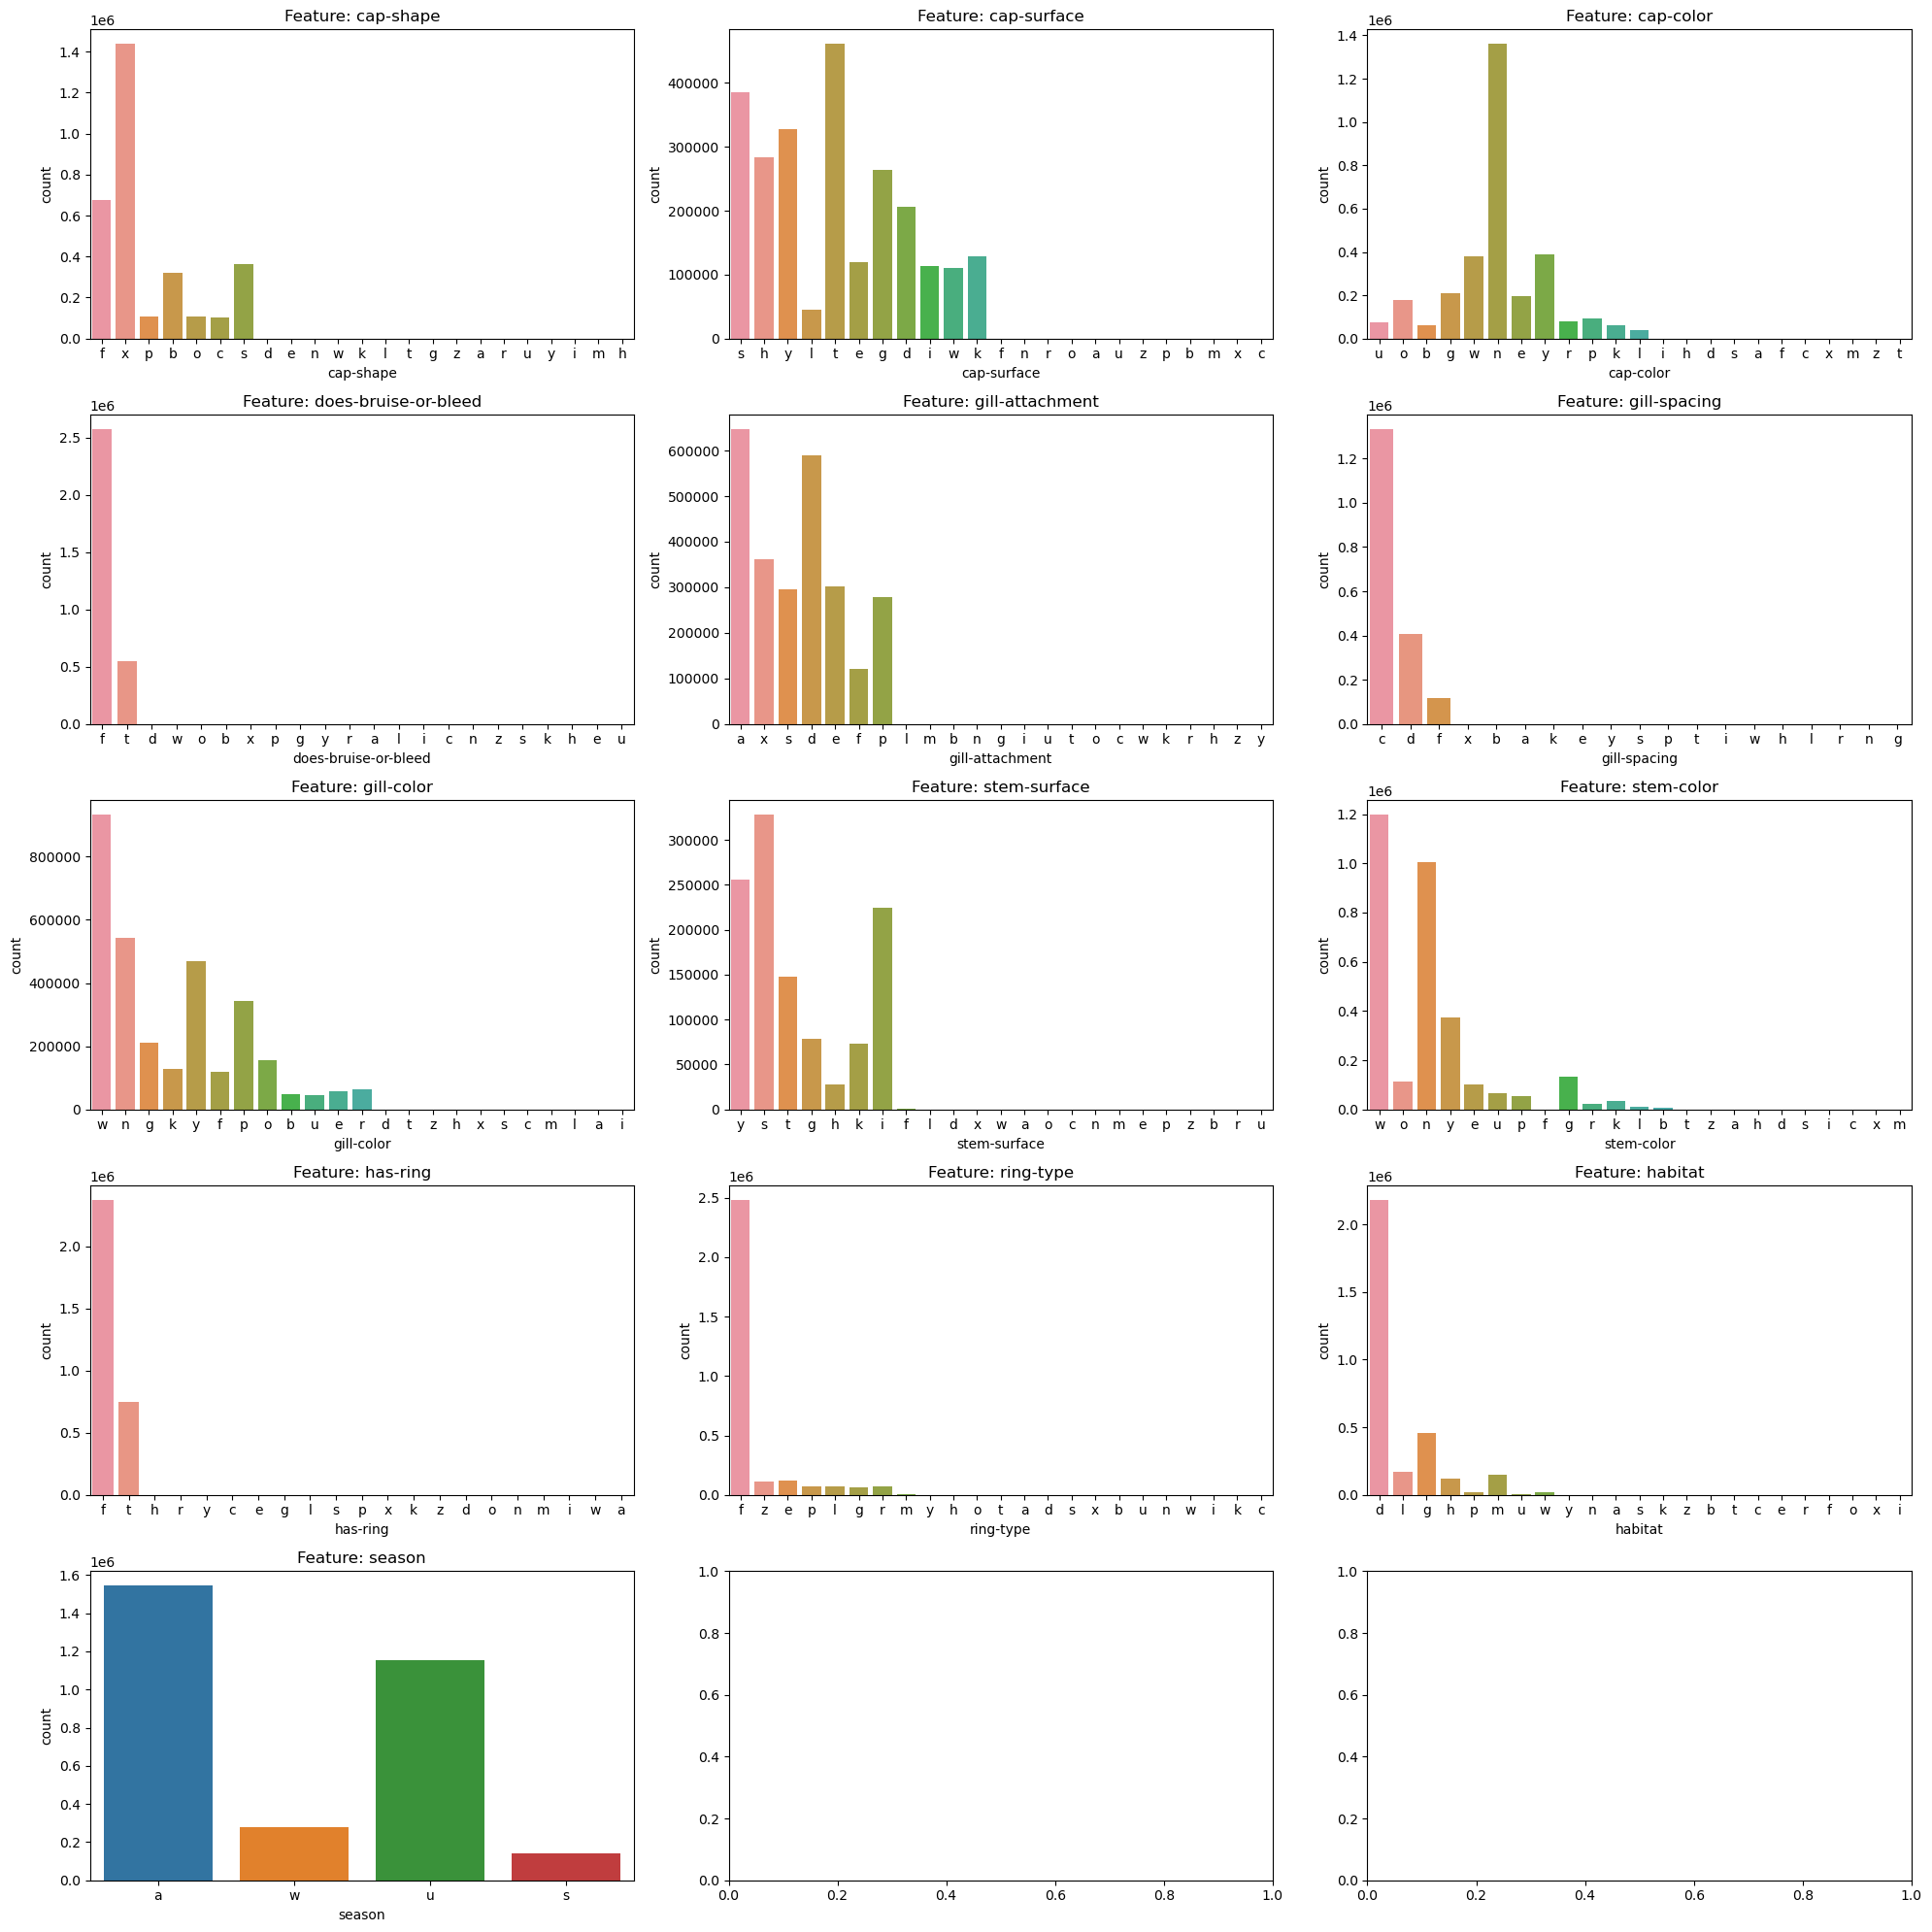

In [ ]:
# train data의 분포
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for i, col in enumerate(cat_cols):
    g = sns.countplot(x=col, data=train_df, ax=ax[i//3][i%3])
    g.set_title(f"Feature: {col}")
plt.tight_layout()
plt.show()


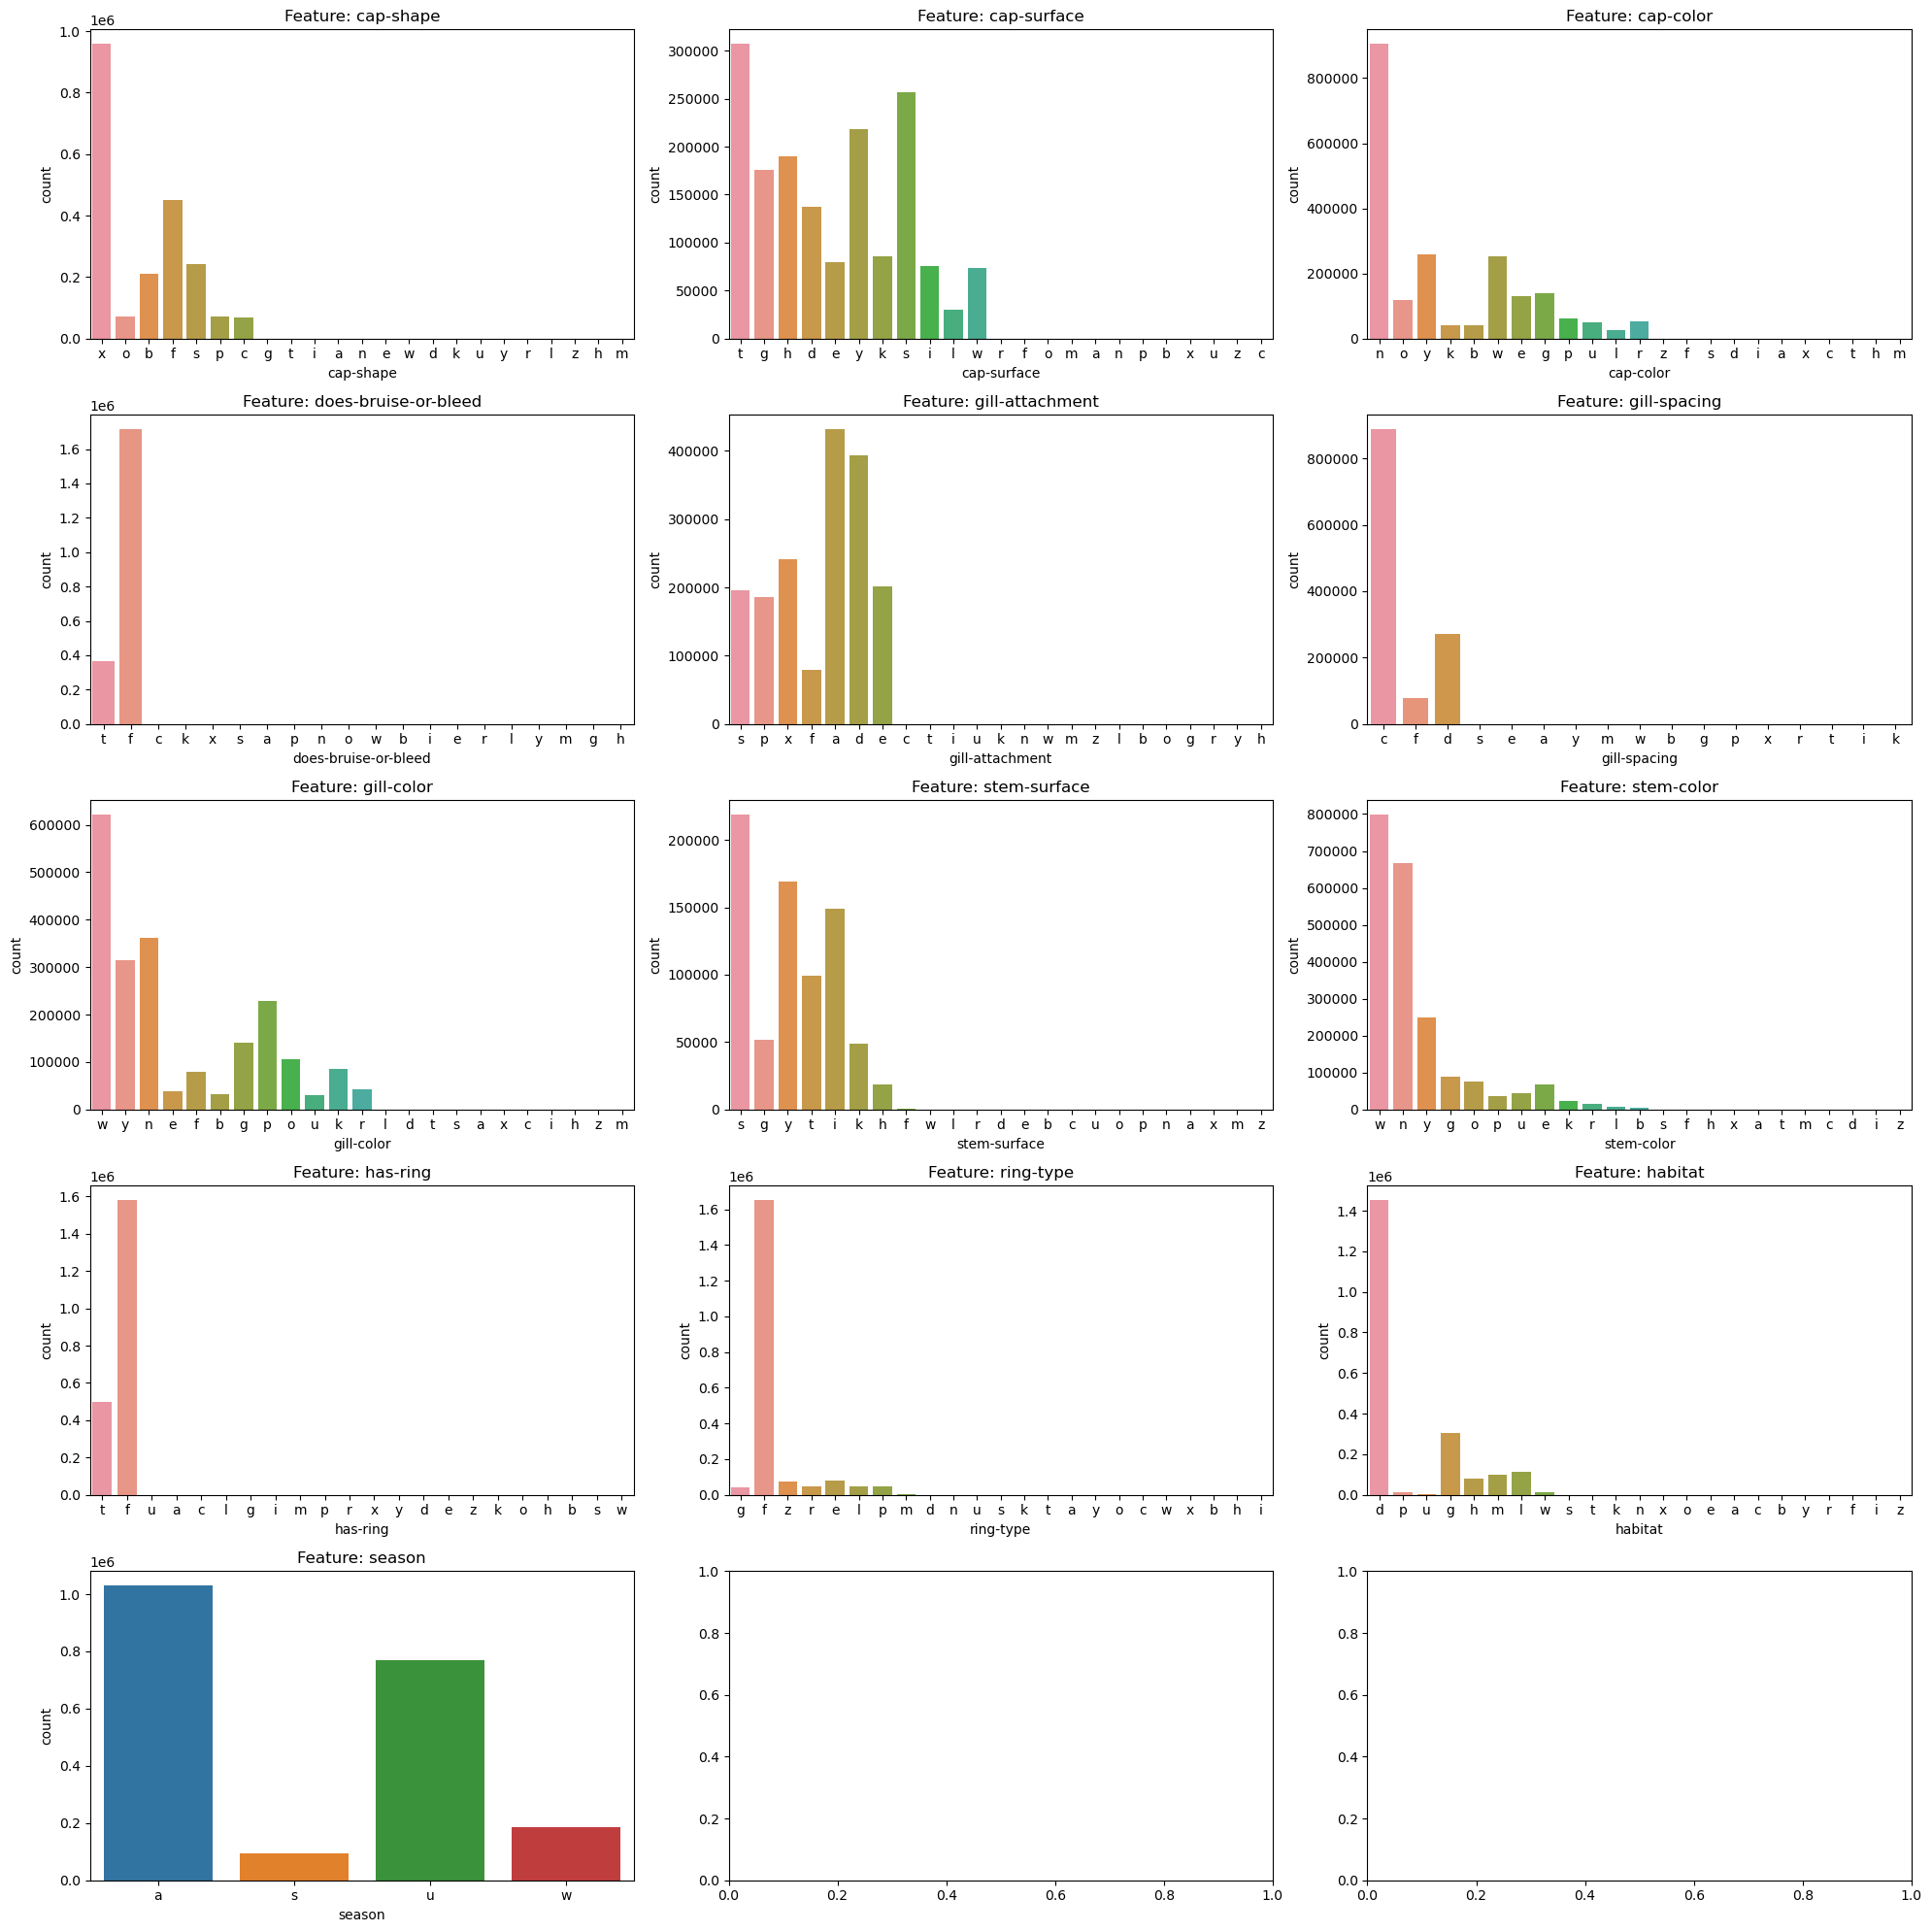

In [ ]:
# test data의 분포
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for i, col in enumerate(cat_cols):
    g = sns.countplot(x=col, data=test_df, ax=ax[i//3][i%3])
    g.set_title(f"Feature: {col}")
plt.tight_layout()
plt.show()

* 범주형 데이터 분포 거의 비슷함

#### 4.2 Numerical values 분포 살피기

In [ ]:
# train data
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
# for i, col in enumerate(num_cols):
#     sns.histplot(x=col, data=train_df, bins=50, kde=True, ax=ax[i])
#     ax[i].set_title(col)

# plt.tight_layout()
# plt.show()

In [ ]:
# test data
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
# for i, col in enumerate(num_cols):
#     sns.histplot(x=col, data=test_df, bins=50, kde=True, ax=ax[i])
#     ax[i].set_title(col)

# plt.tight_layout()
# plt.show()

In [ ]:
# train, test dataset num_cols에서의 skew 값
for col in num_cols:
    print("Train {}의 skew: {:.4f}, 평균: {:.4f}, 분산: {:.4f}".format(col, train_df[col].skew(), train_df[col].mean(), train_df[col].var()))
print("====================")
for col in num_cols:
    print("Test {}의 skew: {}, 평균: {:.4f}, 분산: {:.4f}".format(col, test_df[col].skew(), test_df[col].mean(), test_df[col].var()))

Train cap-diameter의 skew: 3.9726, 평균: 6.3099, 분산: 21.6968
Train stem-height의 skew: 1.9267, 평균: 6.3483, 분산: 7.2887
Train stem-width의 skew: 1.2354, 평균: 11.1539, 분산: 65.5373
Test cap-diameter의 skew: 4.957160671814814, 평균: 6.3062, 분산: 21.9536
Test stem-height의 skew: 1.9219512559079777, 평균: 6.3465, 분산: 7.2845
Test stem-width의 skew: 1.2493412142722096, 평균: 11.1484, 분산: 65.6129


* 아직 null 값들이 있으므로 다 처리해주고 scaling 혹은 log로 처리해주자

# 5. Null Filling / Encoding

In [ ]:
train_df.isnull().sum()

class                         0
cap-diameter                  4
cap-shape                    95
cap-surface              671018
cap-color                    84
does-bruise-or-bleed         12
gill-attachment          523949
gill-spacing            1258345
gill-color                  124
stem-height                   0
stem-width                    0
stem-surface            1980786
stem-color                   78
has-ring                     26
ring-type                128903
habitat                      83
season                        0
dtype: int64

In [ ]:
test_df.isnull().sum()

cap-diameter                  7
cap-shape                    71
cap-surface              446945
cap-color                    55
does-bruise-or-bleed         12
gill-attachment          349867
gill-spacing             839613
gill-color                   93
stem-height                   1
stem-width                    0
stem-surface            1321528
stem-color                   55
has-ring                     20
ring-type                 86211
habitat                      56
season                        0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef

In [ ]:
# skewness를 줄이기 위해 log 변환
for col in num_cols:
    train_df[col] = train_df[col].apply(lambda x: np.log(x) if x>0 else 0)
    test_df[col] = test_df[col].apply(lambda x: np.log(x) if x>0 else 0)

In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

def fillingNull_encoding(df, preprocessor, training=True):
    if training:
        df_transformed = pd.DataFrame(preprocessor.fit_transform(df[num_cols + cat_cols]), columns=num_cols+cat_cols)
        df_transformed['class'] = df['class']
    else:
        df_transformed = pd.DataFrame(preprocessor.transform(df[num_cols + cat_cols]), columns=num_cols+cat_cols)

    display(df_transformed.isnull().sum())
    return df_transformed

In [ ]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,2.174752,f,s,u,f,a,c,w,1.506297,2.733718,NaN,w,f,f,d,a
1,p,1.506297,x,h,o,f,a,c,n,1.566530,1.868721,y,o,t,z,d,w
2,e,1.937302,f,s,b,f,x,c,w,1.924249,2.295560,s,n,f,f,l,w
3,e,1.355835,f,y,g,f,s,NaN,g,1.425515,1.876407,NaN,w,f,f,d,u
4,e,1.766442,x,l,w,f,d,NaN,w,1.214913,2.123458,NaN,w,f,f,g,a


In [ ]:
changed_train_df = fillingNull_encoding(train_df, preprocessor, training=True)

,0
cap-diameter,0
stem-height,0
stem-width,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0


In [ ]:
changed_train_df.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season,class
0,0.788150,-0.673283,0.735473,5.0,16.0,18.0,5.0,0.0,2.0,19.0,16.0,19.0,4.0,5.0,3.0,0.0,e
1,-0.152124,-0.519694,-0.281953,20.0,7.0,13.0,5.0,0.0,2.0,12.0,21.0,13.0,16.0,22.0,3.0,3.0,p
2,0.454143,0.392448,0.220104,5.0,16.0,1.0,5.0,20.0,2.0,19.0,16.0,12.0,4.0,5.0,10.0,3.0,e
3,-0.363770,-0.879268,-0.272912,5.0,21.0,6.0,5.0,16.0,2.0,6.0,16.0,19.0,4.0,5.0,3.0,2.0,e
4,0.213805,-1.416281,0.017675,20.0,10.0,19.0,5.0,3.0,2.0,19.0,16.0,19.0,4.0,5.0,6.0,0.0,e


In [ ]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,2.156403,x,NaN,n,t,NaN,NaN,w,2.409644,2.840247,NaN,w,t,g,d,a
1,1.931521,o,t,o,f,NaN,c,y,0.239017,2.374906,NaN,n,f,f,d,a
2,0.693147,b,g,n,f,NaN,c,n,1.821318,1.144223,NaN,n,f,f,d,s
3,1.244155,x,t,n,f,s,c,n,1.605430,2.141242,NaN,w,t,z,d,u
4,1.819699,x,h,y,f,p,NaN,y,1.906575,2.617396,NaN,y,t,NaN,d,u


In [ ]:
changed_test_df = fillingNull_encoding(test_df, preprocessor, training=False)

cap-diameter            0
stem-height             0
stem-width              0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [ ]:
changed_test_df.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0.762339,1.630153,0.860775,20.0,17.0,12.0,16.0,0.0,2.0,19.0,16.0,19.0,16.0,6.0,3.0,0.0
1,0.446012,-3.904708,0.313432,13.0,17.0,13.0,5.0,0.0,2.0,21.0,16.0,12.0,4.0,5.0,3.0,0.0
2,-1.295933,0.129987,-1.134120,1.0,6.0,12.0,5.0,0.0,2.0,12.0,16.0,12.0,4.0,5.0,3.0,1.0
3,-0.520864,-0.420505,0.038592,20.0,17.0,12.0,5.0,16.0,2.0,12.0,16.0,19.0,16.0,22.0,3.0,2.0
4,0.288718,0.347382,0.598653,20.0,7.0,21.0,5.0,14.0,2.0,21.0,16.0,21.0,16.0,5.0,3.0,2.0


In [ ]:
# Target 값 LabelEncoding하기
le = LabelEncoder()
changed_train_df['class'] = le.fit_transform(changed_train_df['class'])
changed_train_df.head()

,cap-diameter,stem-height,stem-width,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season,class
0,0.788150,-0.673283,0.735473,5.0,16.0,18.0,5.0,0.0,2.0,19.0,16.0,19.0,4.0,5.0,3.0,0.0,0
1,-0.152124,-0.519694,-0.281953,20.0,7.0,13.0,5.0,0.0,2.0,12.0,21.0,13.0,16.0,22.0,3.0,3.0,1
2,0.454143,0.392448,0.220104,5.0,16.0,1.0,5.0,20.0,2.0,19.0,16.0,12.0,4.0,5.0,10.0,3.0,0
3,-0.363770,-0.879268,-0.272912,5.0,21.0,6.0,5.0,16.0,2.0,6.0,16.0,19.0,4.0,5.0,3.0,2.0,0
4,0.213805,-1.416281,0.017675,20.0,10.0,19.0,5.0,3.0,2.0,19.0,16.0,19.0,4.0,5.0,6.0,0.0,0


In [ ]:
# train, test dataset num_cols에서의 skew 값
for col in num_cols:
    print("Train {}의 skew: {:.4f}, 평균: {:.4f}, 분산: {:.4f}".format(col, changed_train_df[col].skew(), changed_train_df[col].mean(), changed_train_df[col].var()))
print("====================")
for col in num_cols:
    print("Test {}의 skew: {}, 평균: {:.4f}, 분산: {:.4f}".format(col, changed_test_df[col].skew(), changed_test_df[col].mean(), changed_test_df[col].var()))

Train cap-diameter의 skew: -0.5298, 평균: 0.0000, 분산: 1.0000
Train stem-height의 skew: 0.0046, 평균: -0.0000, 분산: 1.0000
Train stem-width의 skew: -0.5689, 평균: 0.0000, 분산: 1.0000
Test cap-diameter의 skew: -0.5265808909752238, 평균: -0.0015, 분산: 1.0011
Test stem-height의 skew: 0.00805027187872713, 평균: -0.0006, 분산: 0.9989
Test stem-width의 skew: -0.5680847577447173, 평균: -0.0008, 분산: 1.0003


# 6. Modeling
* 실험 편리를 위해 changed_train_df, chagned_test_df 사용

In [ ]:
y_data = changed_train_df['class']
x_data = changed_train_df.drop(labels=['class'], axis=1, inplace=False)

In [ ]:
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [ ]:
pip install catboost

In [ ]:
pip install xgboost=='1.7.3'

In [ ]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(
#     n_estimators=400,
#     max_depth=15,
#     learning_rate=0.01,
#     subsample=0.8,
#     colsample_bytree=0.4,
#     min_child_weight=5,
# )

# xgb.fit(
#     x_train,
#     y_train,
#     eval_set = [(x_val, y_val)],
#     eval_metric = mcc_metric,
#     verbose=True)

C:\Users\82108\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68625	validation_0-mcc:0.78313
[1]	validation_0-logloss:0.67885	validation_0-mcc:0.92373
[2]	validation_0-logloss:0.67174	validation_0-mcc:0.93421
[3]	validation_0-logloss:0.66457	validation_0-mcc:0.95590
[4]	validation_0-logloss:0.65655	validation_0-mcc:0.96331
[5]	validation_0-logloss:0.65048	validation_0-mcc:0.96730
[6]	validation_0-logloss:0.64306	validation_0-mcc:0.97183
[7]	validation_0-logloss:0.63738	validation_0-mcc:0.97268
[8]	validation_0-logloss:0.63074	validation_0-mcc:0.97382
[9]	validation_0-logloss:0.62517	validation_0-mcc:0.97300
[10]	validation_0-logloss:0.61842	validation_0-mcc:0.97406
[11]	validation_0-logloss:0.61239	validation_0-mcc:0.97496
[12]	validation_0-logloss:0.60588	validation_0-mcc:0.97459
[13]	validation_0-logloss:0.60060	validation_0-mcc:0.97487
[14]	validation_0-logloss:0.59487	validation_0-mcc:0.97551
[15]	validation_0-logloss:0.58834	validation_0-mcc:0.97581
[16]	validation_0-logloss:0.58224	validation_0-mcc:0.97627
[17]	va

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping, log_evaluation
from sklearn.linear_model import LogisticRegression

In [ ]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
def cross_validate_score(model, train_df, y, cv, test_data):
    val_scores = []
    test_preds = np.zeros((test_data.shape[0],))
    oof_preds = np.zeros((train_df.shape[0],))

    for fold, (train_idx, val_idx) in enumerate(cv.split(train_df, y)):
        X_train = train_df.iloc[train_idx].reset_index(drop=True)
        y_train = y.iloc[train_idx].reset_index(drop=True)

        X_val = train_df.iloc[val_idx].reset_index(drop=True)
        y_val = y.iloc[val_idx].reset_index(drop=True)

        model = clone(model)

        eval_set = [(X_val, y_val)]

        if isinstance(model, LGBMClassifier):
            model.fit(
                X_train, y_train,
                eval_set=eval_set,
                callbacks=[early_stopping(70)],
            )
        elif isinstance(model, XGBClassifier):
            model.fit(
                X_train, y_train,
                eval_set=eval_set,
                eval_metric = mcc_metric,
                verbose=True
            )
        elif isinstance(model, CatBoostClassifier):
            model.fit(
                X_train, y_train,
                eval_set=eval_set,
                early_stopping_rounds=70,
                verbose=True
            )
        else:
            model.fit(
                X_train, y_train,
            )

        val_probs = model.predict_proba(X_val)[:, 1]  # Get the probabilities
        val_preds = (val_probs > 0.5).astype(int)     # Convert probabilities to class labels for MCC

        val_score = matthews_corrcoef(y_val, val_preds)  # Calculate MCC
        print(f'Fold {fold}: MCC = {val_score:.5f}')

        val_scores.append(val_score)

        oof_preds[val_idx] = val_probs  # Store the probabilities for OOF predictions

        test_preds += model.predict_proba(test_data)[:, 1] / cv.get_n_splits()  # Aggregate test probabilities

    mean_val_score = np.mean(val_scores)
    std_val_score = np.std(val_scores)
    print(f'Mean Validation MCC: {mean_val_score:.7f}')
    print(f'Std Validation MCC: {std_val_score:.7f}')

    return val_scores, test_preds, oof_preds

In [ ]:
cv_summary, test_preds, oof_preds = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# XGBoost

In [ ]:
xgb_params = {
    'tree_method': 'gpu_hist',
 'n_estimators': 1000,
 'subsample': 0.8,
 'colsample_bytree': 0.4,
 'max_depth': 15,
 'min_child_weight': 5,
 'learning_rate': 0.02
}

xgb_tuned = XGBClassifier(**xgb_params, random_state=42)

cv_summary['xgb'], test_preds['xgb'], oof_preds['xgb'] = cross_validate_score(xgb_tuned, x_data , y_data,  cv, changed_test_df)

# LightGBM

In [ ]:
lgbm_params = {
    'n_estimators': 10000,
    'learning_rate': 0.02,
    'max_depth': 10,
    'min_data_in_leaf': 85,
    'subsample': 0.6720606456166781,
    'max_bin': 240,
    'feature_fraction': 0.6946327643448142,

}

lgbm_tuned = LGBMClassifier(**lgbm_params, random_state=42, verbose=10)

cv_summary['lgbm'], test_preds['lgbm'], oof_preds['lgbm'] = cross_validate_score(lgbm_tuned, x_data , y_data,  cv, changed_test_df)

# Catboost

In [ ]:
catb_params = {
    "n_estimators" : 1000,
    "learning_rate" : 0.05,
    'random_strength': 0.3718364180573207,
    'max_bin': 128,
    'depth': 9,
    'l2_leaf_reg': 6,
    'grow_policy': 'SymmetricTree',
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.41936688658110405
}

catb_tunned = CatBoostClassifier(**catb_params, random_state=42)

cv_summary['catb'], test_preds['catb'], oof_preds['catb'] = cross_validate_score(catb_tunned, x_data , y_data,  cv, changed_test_df)

In [ ]:
pred_class = le.inverse_transform(pred)
submission = pd.DataFrame(IDtest, columns=['id'])
submission['class'] = pred_class

In [ ]:
submission.to_csv('submission8_StraightKFold_XGB2.csv', index=False)
pd.read_csv('submission8_StraightKFold_XGB2.csv')

In [ ]:
"""
첫 실험,
xgb = XGBClassifier(
    n_estimators=400,
    max_depth=15,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    min_child_weight=5,
)

metric = mcc

validation_0-logloss:0.06993	validation_0-mcc:0.98150
public score -> 0.98194
"""

"""
두번째 실험,
동일 모델,
eval_metric = 'logloss' 만 다름

결과:
validation_0-logloss:0.06993
public score -> 0.98194 동일...
"""

"""
세번째 실험,
동일 모델,
metric = mcc

결과:
validation_0-logloss:0.06791	validation_0-mcc:0.98184
public score -> 0.98204
"""

"""
네번째 실험,
n_estimators=1000
동일 모델,
metric = mcc

결과:
validation_0-logloss:0.03977	validation_0-mcc:0.98286
public score -> 0.98312
"""

"""
다섯번째 실험,
weird 값을 "error"라는 새로운 값으로 처리
learning_rate = 0.01 그대로 유지

결과:
validation_0-logloss:0.03733	validation_0-mcc:0.98425
public score -> 0.98464
"""


"""
여섯번째 실험,
weird 값을 "error"라는 새로운 값으로 처리
learning_rate = 0.02

결과:
validation_0-logloss:0.03708	validation_0-mcc:0.98419
public score -> 0.98478
"""

"""
일곱번째 실험,
Straight KFold, n_splits=5로 xgb 실험

결과:
Mean Validation MCC: 0.9844321
public score -> 0.98472

"""


"""
여덟번째 실험, 파라미터 안좋네 다시 복
Straight KFold, n_splits=5로 xgb2 실험

결과:
Mean Validation MCC: 0.9842396
public score -> 0.98453
"""